# EEG Emotion Recognition on GAMEEMO

This notebook trains a lightweight **MSDCGTNet** model on the GAMEEMO EEG dataset to classify four game‑evoked emotions:

| Label | ID | Description |
|-------|----|-------------|
| 0 | G1 | Boring |
| 1 | G2 | Calm |
| 2 | G3 | Horror |
| 3 | G4 | Funny |

Run the notebook top‑to‑bottom to:

1. Download and organise the data  
2. Build subject‑wise train / validation splits  
3. Train MSDCGTNet with early stopping & mixed precision  
4. Inspect metrics and a confusion matrix  

## About the GAMEEMO dataset

* **28 subjects** recorded with a 14‑channel Emotiv Epoc + headset  
* **4 five‑minute sessions** per subject – each labelled *Boring*, *Calm*, *Horror* or *Funny*  
* Data provided as **pre‑processed CSV** (clean, notch‑filtered, 256 Hz)

The goal is to recognise the game‑elicited emotion from raw EEG.  
We evaluate with a **subject‑wise split** to report true generalisation to unseen people.

## 0 Setup & data download

In [1]:
from pathlib import Path
import subprocess, sys

DATA_ROOT = Path("../data/GAMEEMO")
DATA_ROOT.mkdir(parents=True, exist_ok=True)

if not any(DATA_ROOT.rglob("*.csv")):
    print("Downloading GAMEEMO")
    try:
        subprocess.run([
            "kaggle", "datasets", "download",
            "-d", "sigfest/database-for-emotion-recognition-system-gameemo",
            "-p", str(DATA_ROOT.parent), "--unzip",
        ], check=True)
    except Exception as e:
        sys.stderr.write(f"⚠️ Kaggle download failed: {e}\n")
else:
    print("Dataset already present - skipping download.")

Dataset already present - skipping download.


Using device: cuda
Initializing dataset...
Scanning data root: C:\Users\dmrom\emotion-recognition\data\GAMEEMO
Found 112 recordings from 28 subjects.
Number of training samples: 90
Number of testing samples: 22

--- Starting Training ---


Epochs:   4%|▍         | 1/25 [00:07<02:59,  7.47s/it, TrainAcc=0.2778, TrainLoss=1.3986]

Epoch 1/25 => Train Loss: 1.3986, Train Acc: 0.2778


Epochs:   8%|▊         | 2/25 [00:14<02:43,  7.10s/it, TrainAcc=0.4444, TrainLoss=1.2223]

Epoch 2/25 => Train Loss: 1.2223, Train Acc: 0.4444


Epochs:  12%|█▏        | 3/25 [00:21<02:32,  6.94s/it, TrainAcc=0.7333, TrainLoss=1.0866]

Epoch 3/25 => Train Loss: 1.0866, Train Acc: 0.7333


Epochs:  16%|█▌        | 4/25 [00:27<02:25,  6.93s/it, TrainAcc=0.7778, TrainLoss=0.9614]

Epoch 4/25 => Train Loss: 0.9614, Train Acc: 0.7778


Epochs:  16%|█▌        | 4/25 [00:34<02:25,  6.93s/it, TrainAcc=0.8111, TrainLoss=0.7962]

Epoch 5/25 => Train Loss: 0.7962, Train Acc: 0.8111

Epochs:  20%|██        | 5/25 [00:36<02:28,  7.45s/it, TrainAcc=0.8111, TrainLoss=0.7962, ValAcc=0.6818, ValLoss=0.9421]

 -- Val Loss: 0.9421, Val Acc: 0.6818


Epochs:  24%|██▍       | 6/25 [00:43<02:16,  7.19s/it, TrainAcc=0.8778, TrainLoss=0.6340]                               

Epoch 6/25 => Train Loss: 0.6340, Train Acc: 0.8778


Epochs:  28%|██▊       | 7/25 [00:49<02:07,  7.09s/it, TrainAcc=0.9111, TrainLoss=0.5011]

Epoch 7/25 => Train Loss: 0.5011, Train Acc: 0.9111


Epochs:  32%|███▏      | 8/25 [00:56<01:59,  7.04s/it, TrainAcc=0.9778, TrainLoss=0.3620]

Epoch 8/25 => Train Loss: 0.3620, Train Acc: 0.9778


Epochs:  36%|███▌      | 9/25 [01:03<01:51,  6.98s/it, TrainAcc=0.9889, TrainLoss=0.2520]

Epoch 9/25 => Train Loss: 0.2520, Train Acc: 0.9889


Epochs:  36%|███▌      | 9/25 [01:10<01:51,  6.98s/it, TrainAcc=0.9889, TrainLoss=0.1902]

Epoch 10/25 => Train Loss: 0.1902, Train Acc: 0.9889

Epochs:  40%|████      | 10/25 [01:12<01:51,  7.45s/it, TrainAcc=0.9889, TrainLoss=0.1902, ValAcc=0.9091, ValLoss=0.3783]

 -- Val Loss: 0.3783, Val Acc: 0.9091


Epochs:  44%|████▍     | 11/25 [01:19<01:42,  7.31s/it, TrainAcc=1.0000, TrainLoss=0.1134]                               

Epoch 11/25 => Train Loss: 0.1134, Train Acc: 1.0000


Epochs:  48%|████▊     | 12/25 [01:26<01:34,  7.23s/it, TrainAcc=1.0000, TrainLoss=0.0697]

Epoch 12/25 => Train Loss: 0.0697, Train Acc: 1.0000


Epochs:  52%|█████▏    | 13/25 [01:33<01:25,  7.13s/it, TrainAcc=1.0000, TrainLoss=0.0559]

Epoch 13/25 => Train Loss: 0.0559, Train Acc: 1.0000


Epochs:  56%|█████▌    | 14/25 [01:39<01:16,  6.98s/it, TrainAcc=1.0000, TrainLoss=0.0332]

Epoch 14/25 => Train Loss: 0.0332, Train Acc: 1.0000


Epochs:  56%|█████▌    | 14/25 [01:46<01:16,  6.98s/it, TrainAcc=1.0000, TrainLoss=0.0258]

Epoch 15/25 => Train Loss: 0.0258, Train Acc: 1.0000

Epochs:  60%|██████    | 15/25 [01:48<01:14,  7.47s/it, TrainAcc=1.0000, TrainLoss=0.0258, ValAcc=0.9545, ValLoss=0.2318]

 -- Val Loss: 0.2318, Val Acc: 0.9545


Epochs:  64%|██████▍   | 16/25 [01:55<01:05,  7.31s/it, TrainAcc=1.0000, TrainLoss=0.0204]                               

Epoch 16/25 => Train Loss: 0.0204, Train Acc: 1.0000


Epochs:  68%|██████▊   | 17/25 [02:02<00:57,  7.17s/it, TrainAcc=1.0000, TrainLoss=0.0163]

Epoch 17/25 => Train Loss: 0.0163, Train Acc: 1.0000


Epochs:  72%|███████▏  | 18/25 [02:09<00:50,  7.15s/it, TrainAcc=1.0000, TrainLoss=0.0137]

Epoch 18/25 => Train Loss: 0.0137, Train Acc: 1.0000


Epochs:  76%|███████▌  | 19/25 [02:16<00:42,  7.09s/it, TrainAcc=1.0000, TrainLoss=0.0119]

Epoch 19/25 => Train Loss: 0.0119, Train Acc: 1.0000


Epochs:  76%|███████▌  | 19/25 [02:23<00:42,  7.09s/it, TrainAcc=1.0000, TrainLoss=0.0104]

Epoch 20/25 => Train Loss: 0.0104, Train Acc: 1.0000

Epochs:  80%|████████  | 20/25 [02:24<00:37,  7.55s/it, TrainAcc=1.0000, TrainLoss=0.0104, ValAcc=0.9545, ValLoss=0.2665]

 -- Val Loss: 0.2665, Val Acc: 0.9545


Epochs:  84%|████████▍ | 21/25 [02:31<00:29,  7.36s/it, TrainAcc=1.0000, TrainLoss=0.0092]                               

Epoch 21/25 => Train Loss: 0.0092, Train Acc: 1.0000


Epochs:  88%|████████▊ | 22/25 [02:38<00:21,  7.29s/it, TrainAcc=1.0000, TrainLoss=0.0083]

Epoch 22/25 => Train Loss: 0.0083, Train Acc: 1.0000


Epochs:  92%|█████████▏| 23/25 [02:45<00:14,  7.16s/it, TrainAcc=1.0000, TrainLoss=0.0076]

Epoch 23/25 => Train Loss: 0.0076, Train Acc: 1.0000


Epochs:  96%|█████████▌| 24/25 [02:52<00:07,  7.09s/it, TrainAcc=1.0000, TrainLoss=0.0069]

Epoch 24/25 => Train Loss: 0.0069, Train Acc: 1.0000


Epochs:  96%|█████████▌| 24/25 [02:59<00:07,  7.09s/it, TrainAcc=1.0000, TrainLoss=0.0064]

Epoch 25/25 => Train Loss: 0.0064, Train Acc: 1.0000

Epochs: 100%|██████████| 25/25 [03:01<00:00,  7.25s/it, TrainAcc=1.0000, TrainLoss=0.0064, ValAcc=0.9545, ValLoss=0.2774]


 -- Val Loss: 0.2774, Val Acc: 0.9545

--- Training Finished ---

--- Evaluating on Test Set ---


Final Test Loss: 0.2774
Final Test Accuracy: 0.9545

Classification Report:
              precision    recall  f1-score   support

          G1       1.00      1.00      1.00         8
          G2       0.86      1.00      0.92         6
          G3       1.00      0.86      0.92         7
          G4       1.00      1.00      1.00         1

    accuracy                           0.95        22
   macro avg       0.96      0.96      0.96        22
weighted avg       0.96      0.95      0.95        22



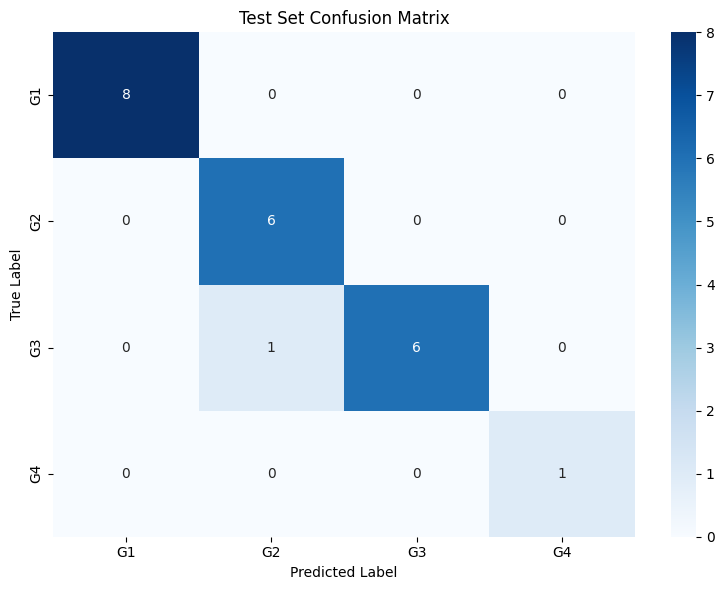

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from pathlib import Path
import re
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm # Added tqdm

# --- Configuration ---
DATA_ROOT = Path("../data/GAMEEMO") # Assuming data is in a subfolder "GAMEEMO"
NUM_EPOCHS = 25 # Adjust as needed
BATCH_SIZE = 16 # Adjust based on your GPU memory
LEARNING_RATE = 0.001
TEST_SPLIT_RATIO = 0.2
NUM_CLASSES = 4 # G1, G2, G3, G4
NUM_CHANNELS = 14 # As per dataset description
FIXED_SEQUENCE_LENGTH = 3000 # Example, adjust after inspecting data

# --- 1. Data Loading and Preprocessing ---

def g_label(fn_name):
    """Extracts game label (0-3) from a filename."""
    match = re.search(r"G([1-4])", fn_name)
    if match:
        return int(match.group(1)) - 1
    raise ValueError(f"Could not extract label from {fn_name}")

class EEGDataset(Dataset):
    """
    Custom PyTorch Dataset for GAMEEMO EEG data.
    """
    def __init__(self, data_root, fixed_sequence_length, transform=None):
        self.data_root = Path(data_root)
        self.fixed_sequence_length = fixed_sequence_length
        self.transform = transform
        self.eeg_paths = []
        self.labels = []
        self._load_data()

    def _load_data(self):
        """Loads all EEG file paths and their corresponding labels."""
        print(f"Scanning data root: {self.data_root.resolve()}")
        if not self.data_root.exists():
            print(f"ERROR: Data root directory '{self.data_root.resolve()}' does not exist.")
            print("Please ensure the GAMEEMO dataset is downloaded and extracted to this location,")
            print("or update the DATA_ROOT variable in the script.")
            return

        subject_count = 0
        for subj_dir in self.data_root.iterdir():
            if subj_dir.is_dir() and re.fullmatch(r"\(S\d{2}\)", subj_dir.name):
                subject_count +=1
                csv_dir = subj_dir / "Preprocessed EEG Data" / ".csv format"
                if csv_dir.exists():
                    for p in csv_dir.glob("*.csv"):
                        try:
                            label = g_label(p.name)
                            self.eeg_paths.append(p)
                            self.labels.append(label)
                        except ValueError:
                            # Silently skip files with label errors, or log to a file
                            pass
                # else:
                    # Optionally log if a subject folder is missing the CSV directory
                    # print(f"Warning: .csv format directory not found in {subj_dir}")
        
        if subject_count == 0:
            print(f"Warning: No subject directories like (SXX) found in {self.data_root.resolve()}")
        print(f"Found {len(self.eeg_paths)} recordings from {subject_count} subjects.")
        if not self.eeg_paths:
            print("CRITICAL: No EEG files were found. Please check the DATA_ROOT path and dataset structure.")

    def __len__(self):
        return len(self.eeg_paths)

    def __getitem__(self, idx):
        file_path = self.eeg_paths[idx]
        label = self.labels[idx]

        try:
            df = pd.read_csv(file_path, header=0) # Explicitly state header is on row 0

            # Corrected logic: User specified the comma is at the END of the header.
            # This means pandas might create an extra unnamed column at the end.
            # We should take the FIRST NUM_CHANNELS columns.
            if df.shape[1] == NUM_CHANNELS + 1:
                # If there's an extra column, assume it's the last one due to trailing comma
                df = df.iloc[:, :NUM_CHANNELS]
            elif df.shape[1] == NUM_CHANNELS:
                # Correct number of columns
                pass
            else:
                # Incorrect number of columns for data
                # Log this error if necessary, but avoid spammy prints
                # print(f"Error: File {file_path.name} has {df.shape[1]} data columns after header, expected {NUM_CHANNELS}. Skipping.")
                return None, None

            eeg_data = df.values.astype(np.float32)

            # Pad or truncate sequence
            if eeg_data.shape[0] > self.fixed_sequence_length:
                eeg_data = eeg_data[:self.fixed_sequence_length, :]
            else:
                padding_rows = self.fixed_sequence_length - eeg_data.shape[0]
                if padding_rows > 0: # Ensure padding is only added if needed
                    padding = np.zeros((padding_rows, NUM_CHANNELS), dtype=np.float32)
                    eeg_data = np.vstack((eeg_data, padding))
            
            # Ensure eeg_data has the correct shape before transposing
            if eeg_data.shape[1] != NUM_CHANNELS:
                # This case should ideally be caught earlier
                # print(f"Error: File {file_path.name} data has {eeg_data.shape[1]} channels after processing, expected {NUM_CHANNELS}. Skipping.")
                return None, None

            # Transpose to (channels, sequence_length) for Conv1D
            eeg_data = eeg_data.T # (NUM_CHANNELS, fixed_sequence_length)

            if self.transform:
                eeg_data = self.transform(eeg_data)

            return torch.tensor(eeg_data, dtype=torch.float32), torch.tensor(label, dtype=torch.long)

        except pd.errors.EmptyDataError:
            # print(f"Warning: File {file_path.name} is empty. Skipping.")
            return None, None
        except Exception: # Catch other potential errors during file processing
            # print(f"Error processing file {file_path.name}: {e}. Skipping.")
            return None, None

def custom_collate_fn(batch):
    """
    Collate function to filter out None items from the batch.
    These None items can result from file processing errors in __getitem__.
    """
    # Filter out None items
    batch = [item for item in batch if item[0] is not None and item[1] is not None]
    if not batch: # If all items in the batch failed
        return None, None 
    # Use default_collate for the valid items
    return torch.utils.data.dataloader.default_collate(batch)


# --- 2. Model Architecture (CNN + LSTM) ---
class EEG_CNN_LSTM(nn.Module):
    def __init__(self, num_classes, num_channels, sequence_length, lstm_hidden_size=128, num_lstm_layers=1):
        super(EEG_CNN_LSTM, self).__init__()
        self.num_channels = num_channels
        self.sequence_length = sequence_length

        # CNN part for spatial feature extraction
        self.conv1 = nn.Conv1d(in_channels=num_channels, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)
        # Output of pool1: (batch, 32, sequence_length / 2)

        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)
        # Output of pool2: (batch, 64, sequence_length / 4)
        
        self.lstm_input_features = 64
        # LSTM part for temporal feature extraction
        self.lstm = nn.LSTM(input_size=self.lstm_input_features,
                              hidden_size=lstm_hidden_size,
                              num_layers=num_lstm_layers,
                              batch_first=True) # batch_first=True means input/output shape is (batch, seq, feature)

        # Fully connected layer for classification
        self.fc = nn.Linear(lstm_hidden_size, num_classes)

    def forward(self, x):
        # x shape: (batch_size, num_channels, sequence_length)
        
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        # x shape after CNN: (batch_size, 64, sequence_length / 4)

        x = x.permute(0, 2, 1) # (batch_size, sequence_length / 4, 64)
        
        lstm_out, (h_n, c_n) = self.lstm(x)
        # h_n shape: (num_lstm_layers, batch_size, lstm_hidden_size)
        # We want the last layer's hidden state: h_n[-1] -> (batch_size, lstm_hidden_size)
        x = h_n[-1] 

        x = self.fc(x)
        # x shape: (batch_size, num_classes)
        return x

# --- 3. Training and Evaluation Functions ---
def train_model(model, train_loader, criterion, optimizer, device, epoch_num, total_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    # Wrap train_loader with tqdm for a progress bar
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch_num+1}/{total_epochs} [Train]", leave=False)
    for inputs, labels in progress_bar:
        if inputs is None or labels is None : # Handle cases where collate_fn returned None
            continue # Skip this batch
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()
        
        # Update tqdm progress bar
        progress_bar.set_postfix(loss=running_loss/total_samples if total_samples > 0 else 0, 
                                 acc=correct_predictions/total_samples if total_samples > 0 else 0)

    if total_samples == 0: # All batches might have been skipped
        return 0.0, 0.0

    epoch_loss = running_loss / total_samples
    epoch_acc = correct_predictions / total_samples
    return epoch_loss, epoch_acc

def evaluate_model(model, test_loader, criterion, device, epoch_num, total_epochs, eval_type="Val"):
    model.eval()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    all_labels = []
    all_predictions = []

    # Wrap test_loader with tqdm for a progress bar
    progress_bar = tqdm(test_loader, desc=f"Epoch {epoch_num+1}/{total_epochs} [{eval_type}]", leave=False)
    with torch.no_grad():
        for inputs, labels in progress_bar:
            if inputs is None or labels is None :
                continue # Skip this batch
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total_samples += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()
            
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

            # Update tqdm progress bar
            progress_bar.set_postfix(loss=running_loss/total_samples if total_samples > 0 else 0,
                                     acc=correct_predictions/total_samples if total_samples > 0 else 0)

    if total_samples == 0: # All batches might have been skipped
        return 0.0, 0.0, [], []
        
    epoch_loss = running_loss / total_samples
    epoch_acc = correct_predictions / total_samples
    return epoch_loss, epoch_acc, all_labels, all_predictions

def plot_confusion_matrix(cm, class_names, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout() # Adjust layout to prevent labels from being cut off
    plt.show()

# --- Main Execution ---
if __name__ == '__main__':
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Create dataset
    print("Initializing dataset...")
    full_dataset = EEGDataset(data_root=DATA_ROOT, fixed_sequence_length=FIXED_SEQUENCE_LENGTH)

    if not full_dataset.eeg_paths:
        print("No data loaded. Exiting.")
        exit()
        
    # Split dataset
    num_samples = len(full_dataset)
    test_size = int(TEST_SPLIT_RATIO * num_samples)
    train_size = num_samples - test_size
    
    if train_size <= 0 or test_size <= 0:
        min_samples_needed = int(1 / TEST_SPLIT_RATIO) if TEST_SPLIT_RATIO > 0 else 2 # Basic check
        print(f"Dataset too small for splitting with ratio {TEST_SPLIT_RATIO}. Need at least {min_samples_needed} samples for a split.")
        if num_samples > 0:
             train_dataset = full_dataset
             # For evaluation, it's better to have a separate test set.
             # If forced to use the same, be aware of inflated metrics.
             # Consider a warning or different handling if this is not acceptable.
             print(f"Warning: Using all {num_samples} samples for training. No separate test set for validation during epoch. Final evaluation will be on this data.")
             # Create a DataLoader for the full dataset to be used as 'test_loader' for validation reports
             test_dataset = full_dataset # This means val_loss/acc will be on training data if no proper split
        else:
            print("CRITICAL: Dataset is empty after initialization. Cannot proceed.")
            exit()
    else:
        train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

    print(f"Number of training samples: {len(train_dataset)}")
    print(f"Number of testing samples: {len(test_dataset)}")

    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=custom_collate_fn, num_workers=0, pin_memory=True if device.type=='cuda' else False)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=custom_collate_fn, num_workers=0, pin_memory=True if device.type=='cuda' else False)

    # Initialize model, criterion, optimizer
    model = EEG_CNN_LSTM(num_classes=NUM_CLASSES, num_channels=NUM_CHANNELS, sequence_length=FIXED_SEQUENCE_LENGTH).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    print("\n--- Starting Training ---")
    # Overall progress bar for epochs
    epoch_progress_bar = tqdm(range(NUM_EPOCHS), desc="Epochs")
    for epoch in epoch_progress_bar:
        train_loss, train_acc = train_model(model, train_loader, criterion, optimizer, device, epoch, NUM_EPOCHS)
        
        # Update epoch progress bar postfix with training results
        epoch_progress_bar.set_postfix(TrainLoss=f"{train_loss:.4f}", TrainAcc=f"{train_acc:.4f}")
        print(f"Epoch {epoch+1}/{NUM_EPOCHS} => Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}", end="")

        # Evaluate on the test set (as validation) periodically
        if (epoch + 1) % 5 == 0 or epoch == NUM_EPOCHS - 1:
            val_loss, val_acc, _, _ = evaluate_model(model, test_loader, criterion, device, epoch, NUM_EPOCHS, eval_type="Val")
            print(f" -- Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
            # Also update epoch_progress_bar if you want validation results there too
            epoch_progress_bar.set_postfix(TrainLoss=f"{train_loss:.4f}", TrainAcc=f"{train_acc:.4f}", ValLoss=f"{val_loss:.4f}", ValAcc=f"{val_acc:.4f}")
        else:
            print() # Newline if no validation print

    print("\n--- Training Finished ---")

    # Evaluate the model on the test set
    print("\n--- Evaluating on Test Set ---")
    # Re-use evaluate_model, final evaluation on the test_loader
    test_loss, test_acc, true_labels, predicted_labels = evaluate_model(model, test_loader, criterion, device, NUM_EPOCHS-1, NUM_EPOCHS, eval_type="Test") # epoch_num is just for desc
    print(f"Final Test Loss: {test_loss:.4f}")
    print(f"Final Test Accuracy: {test_acc:.4f}")

    if true_labels and predicted_labels: # Check if lists are not empty
        # Classification Report
        class_names = [f"G{i+1}" for i in range(NUM_CLASSES)] # G1, G2, G3, G4
        print("\nClassification Report:")
        print(classification_report(true_labels, predicted_labels, target_names=class_names, zero_division=0))

        # Confusion Matrix
        cm = confusion_matrix(true_labels, predicted_labels)
        plot_confusion_matrix(cm, class_names=class_names, title="Test Set Confusion Matrix")
    else:
        print("Could not generate classification report or confusion matrix due to lack of evaluation results (possibly all batches failed or test set was empty).")

    # Example of saving the model
    # torch.save(model.state_dict(), 'eeg_emotion_model_v2.pth')
    # print("Model saved to eeg_emotion_model_v2.pth")
